## Загрузка библиотек

In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from torch.utils.data import Dataset, DataLoader

In [ ]:
pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=2beaffec3061e465c47ef550a56d48ba12d6b4c763e68d25c5682561ee824c1b
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 Anomaly.ipynb
 bert_classif.ipynb
'bert+lstm(окончат).ipynb'
 bert_ner
 BERT_Tutorial.ipynb
' BILSTM_all_entities__.ipynb'
 BILSTM_.ipynb
 BiLSTM_prob.ipynb
 BIO_preprocessing.ipynb
'Colab Notebooks'
 CPD.ipynb
 CRF.ipynb
 csv-xml.ipynb
 data_all.pkl
 data_onlyI.pkl
 data_withBI.pickle
 dict_tegsB.pkl
 dict_tegs.pkl
 dict_wordsB.pkl
 dict_words.pkl
 English.gsheet
 Homework#3.ipynb
 Kate
 keras.ipynb
 Lab1_3.ipynb
 Lab7.ipynb
 Laba_4.ipynb
'NYTimes: Throughout Trial Over George Floyd’s Death, Killings by Police Mount'
 PROJECT_TS
 reg.gsheet
 SD_1.ipynb
 SD_2.ipynb
 SD_3.ipynb
'Slang by victoria_mrmr.pdf'
 Spark_.ipynb
 Untitled
 Untitled0.ipynb
'Untitled (1)'
'Untitled (10)'
 Untitled10.ipynb
'Untitled (11)'
 Untitled11.ipynb
 Untitled12.ipynb
 Untitled13.ipynb
 Untitled14.ipynb
 Untitled15.ipynb
 Untitled16.ipynb
 Untitled17.ipynb
 Untitled18.ipynb
 Untitled19.ipynb
 Untitled1.ipynb
'Untitled (2)'
 Untitled20.ipynb
 Untitled21.ipynb
 Untitled22.ipynb
 Untitled23.ipynb
 Untitled24.ip

In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
cd bert

/content/drive/My Drive/Colab Notebooks/bert


In [ ]:
import umap

## Загрузка данных

В качестве набора данных используются данные медицинских статей, полученные с платформы Arxiv.org


[Ссылка](https://www.kaggle.com/datasets/ekaterinamayatskaya/medical-articles)

In [ ]:
df = pd.read_pickle('Приложение/df_new_10.pkl')

In [ ]:
df

Название статьи  \
0      RECOVER: sequential model optimization platfor...   
1      Unsupervised heart abnormality detection based...   
2          Modularity "for free" in genome architecture?   
3      Representing and extracting knowledge from sin...   
4      Predicted disease compositions of human glioma...   
...                                                  ...   
18967  Unveiling the mystery of visual information pr...   
18968  On the Impact of Mutation-Selection Balance on...   
18969  Improving Prognostic Performance in Resectable...   
18970  Analysis of DNA sequence variation within mari...   
18971  Active information requirements for fixation o...   

                                                Абстракт  \
0      For large libraries of small molecules, exhaus...   
1      Heart Sound (also known as phonocardiogram (PC...   
2      Background: Recent models of genome-proteome e...   
3      Single-cell analysis is currently one of the m...   
4      Background and Purpose: Biopsy is the main det...   
...                                                  ...   
18967  It is generally accepted that human vision is ...   
18968  The interplay between mutation and selection p...   
18969  As an analytic pipeline for quantitative imagi...   
18970  We apply recently developed inference methods ...   
18971  In the context of population genetics, active ...   

                                    Ссылка           Метка  length  
0         https://arxiv.org/abs/2202.04202          Cancer   236.0  
1         https://arxiv.org/abs/2101.05443  cardiovascular   156.0  
2      https://arxiv.org/abs/q-bio/0312032        genetics   203.0  
3         https://arxiv.org/abs/2304.13084        genetics   162.0  
4         https://arxiv.org/abs/1908.02334          Cancer   250.0  
...                                    ...             ...     ...  
18967      https://arxiv.org/abs/0807.0337   brain disease   238.0  
18968      https://arxiv.org/abs/1012.3098        genetics   195.0  
18969     https://arxiv.org/abs/1907.04822          Cancer   214.0  
18970      https://arxiv.org/abs/1209.0813         DNA/RNA   121.0  
18971     https://arxiv.org/abs/2111.06909        genetics    68.0  

[18972 rows x 5 columns]

## Предобработка текста

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import re

Удаление стоп-слов и специальных символов

In [ ]:
sw = stopwords.words('english')

def clean_text(text):

    text = text.lower()

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) #Замена всего пробелами, кроме (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Удаление URLs

    html=re.compile(r'<.*?>')

    text = html.sub(r'',text) #Удаление html tags

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Удаление пунктуации

    text = [word.lower() for word in text.split() if word.lower() not in sw]

    text = " ".join(text) #Удаляем стоп слова

    return text

Лемматизация

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

def lem(text):
    # Создание экземпляра класса WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    # Лемматизация каждого слова в корпусе
    lemmatized_corpus = [lemmatizer.lemmatize(word) for word in text]

    return lemmatized_corpus

In [ ]:
df['Абстракт'] = df['Абстракт'].apply(lambda x: clean_text(x))

In [ ]:
df['Абстракт'] = df['Абстракт'].apply(lambda x: lem(x))

In [ ]:
def join_sent(text):
  text=' '.join(text)
  return text

In [ ]:
df['Абстракт'] = df['Абстракт'].apply(lambda x: join_sent(x))

In [ ]:
labels = np.asarray(df['Метка'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
labels_ = label_encoder.fit_transform(labels)

Загрузка эмбеддинга, полученного моделью трансформера

In [ ]:
embs = np.load('Эмбеддинги/Новый датасет/blue_bert_uncased.npy')

## Кластеризация

In [ ]:
reducer = umap.UMAP(n_neighbors=50,
                            n_components=5,
                         metric='cosine').fit(embs)
embedding = reducer.transform(embs)

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039275 sha256=b98b9dda3d1980955cdc686eb3c648d639f01d2111a1324b2cea9575cae29e21
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=50,
                          metric='euclidean',
               cluster_selection_method='eom').fit(embedding)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


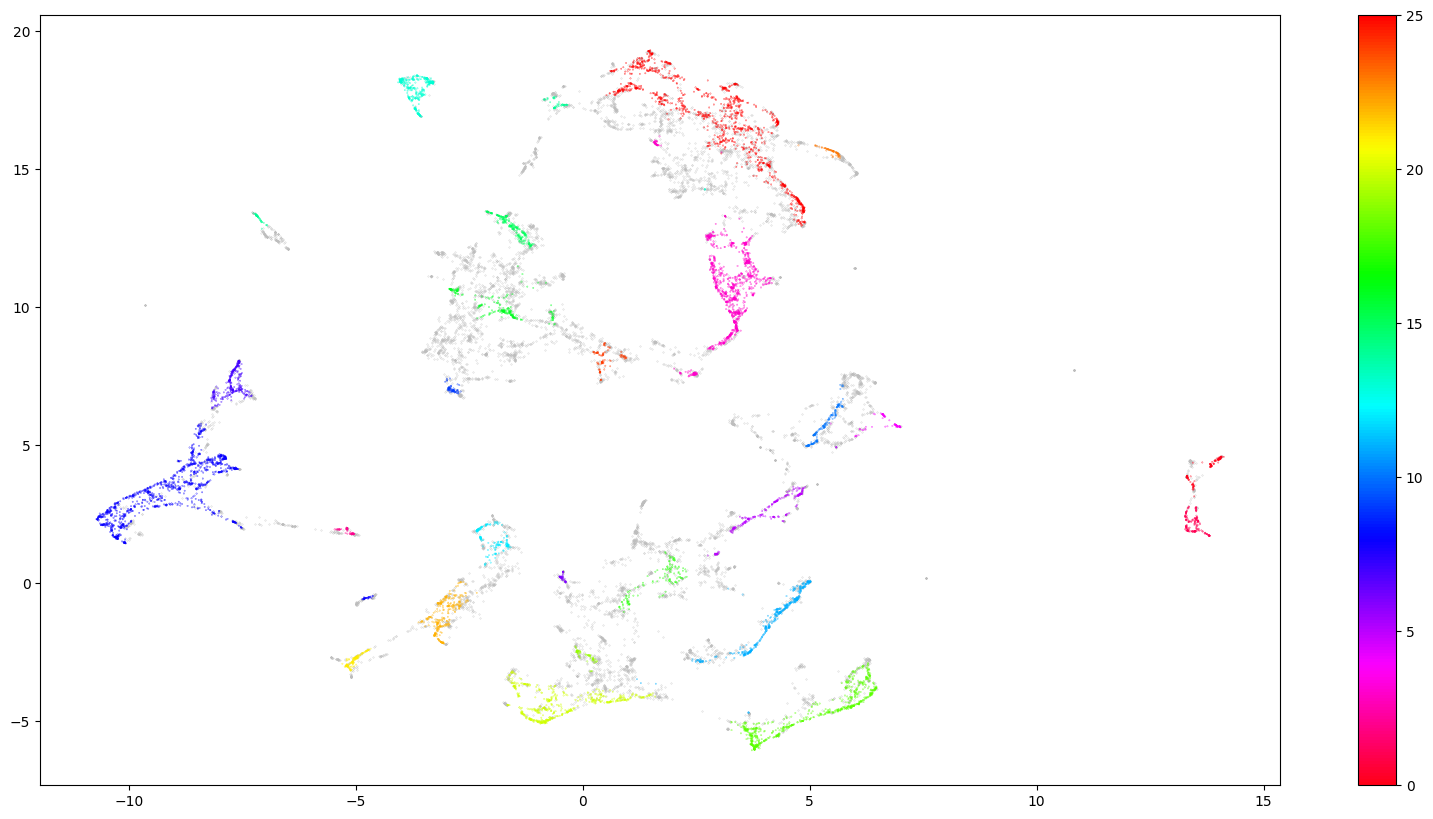

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

## Поиск значимых слов

In [ ]:
docs_df = pd.DataFrame(df, columns=["Абстракт"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Абстракт': ' '.join})

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range,
    stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic.Абстракт.values, m=len(df))

In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Абстракт
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Абстракт":  "Size"},axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

Topic   Size
0      -1  10359
9       8   1252
26     25   1180
4       3   1122
19     18    727
21     20    557
12     11    449
14     13    392
8       7    330
23     22    313

In [ ]:
topic2 = top_n_words[2][:10]
topic2

[('dna', 0.008322851964607348),
 ('evolution', 0.0073842630614715755),
 ('selection', 0.006372577329521163),
 ('dynamics', 0.006369901252025663),
 ('population', 0.00622451752208858),
 ('cells', 0.00619678537747669),
 ('genetic', 0.0054804984476607265),
 ('evolutionary', 0.005426491637514607),
 ('species', 0.005280820504467887),
 ('fitness', 0.005202737698824422)]

In [ ]:
topic3 = top_n_words[20][:4]
topic3

[('fitness', 0.020052603279893968),
 ('evolution', 0.01909437590065346),
 ('population', 0.014953839022277537),
 ('selection', 0.014785697647356552)]

In [ ]:
topic3 = [('evolution', 0.020052603279893968),
 ('fitness', 0.01909437590065346),
 ('population', 0.014953839022277537)]

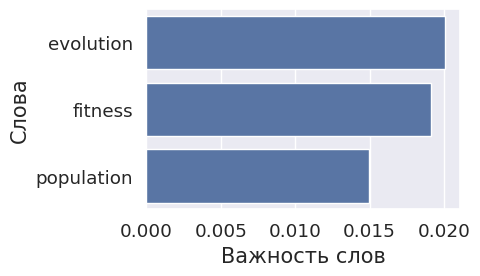

In [ ]:
list_words=[]
list_values=[]
for word, value in topic3:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(5, 3))

sns.set(font_scale=1.2)
# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h')

# Установка меток и заголовка
plt.xlabel("Важность слов", size=15)
plt.ylabel("Слова", size=15)
# plt.title("Topic 3", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

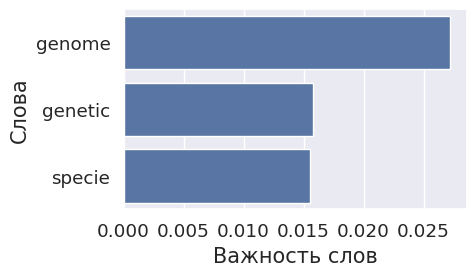

In [ ]:
list_words=[]
list_values=[]
for word, value in topic3:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(5, 3))

sns.set(font_scale=1.2)
# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h')

# Установка меток и заголовка
plt.xlabel("Важность слов", size=15)
plt.ylabel("Слова", size=15)
# plt.title("Topic 3", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

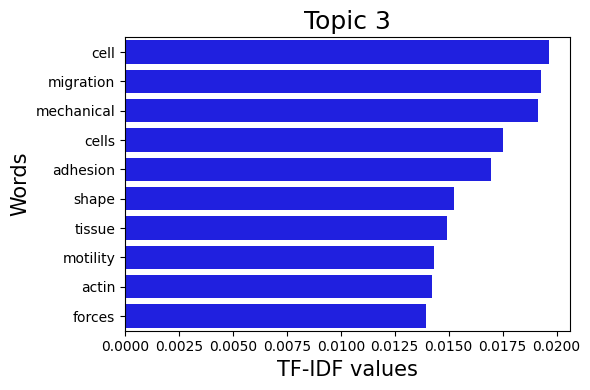

In [ ]:
list_words=[]
list_values=[]
for word, value in topic3:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'blue')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Topic 3", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

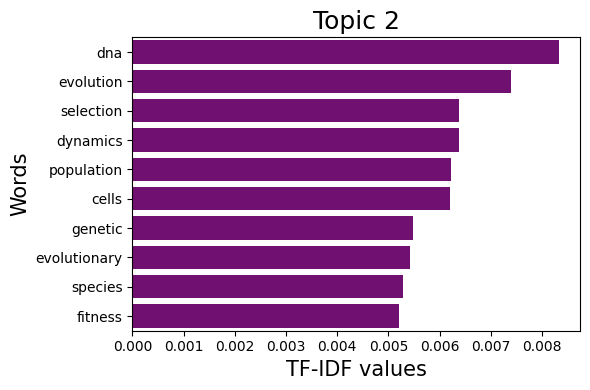

In [ ]:
list_words=[]
list_values=[]
for word, value in topic2:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'purple')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Topic 2", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
topic4 = top_n_words[3][:10]
topic4

[('covid', 0.02316047269127169),
 ('19', 0.023017233551167648),
 ('pandemic', 0.01721376208542625),
 ('epidemic', 0.01642547163521749),
 ('cases', 0.015096826314179504),
 ('spread', 0.014899781826949187),
 ('countries', 0.014893245698986778),
 ('transmission', 0.011876939829391822),
 ('infection', 0.011798280470201818),
 ('social', 0.011420991972700465)]

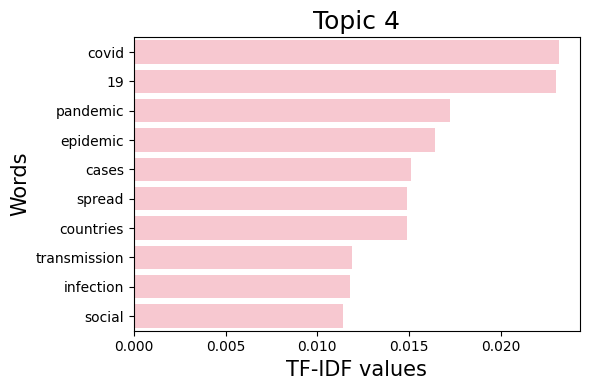

In [ ]:
list_words=[]
list_values=[]
for word, value in topic4:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'pink')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Topic 4", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
topic5 = top_n_words[1][:10]
topic5

[('brain', 0.031380876055965734),
 ('connectivity', 0.015995543931179527),
 ('functional', 0.01592678998922746),
 ('networks', 0.011494640004314827),
 ('activity', 0.01123156387611964),
 ('fmri', 0.011129094199373035),
 ('network', 0.01066200424865389),
 ('neural', 0.010419089839440197),
 ('cognitive', 0.00960240284584649),
 ('eeg', 0.008790255271896743)]

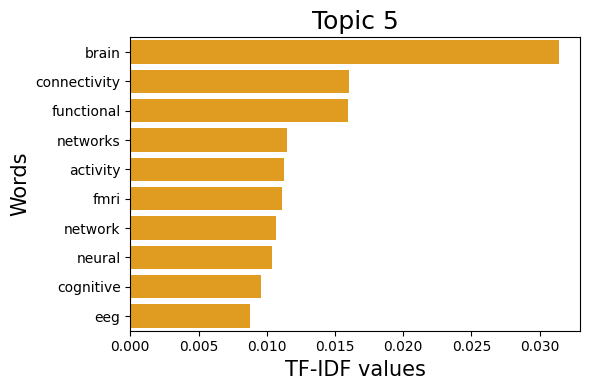

In [ ]:
list_words=[]
list_values=[]
for word, value in topic5:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'orange')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Topic 5", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
topic6 = top_n_words[5][:10]
topic6

[('drug', 0.021186079609994864),
 ('prediction', 0.008896817087979292),
 ('gene', 0.008780775579713546),
 ('seq', 0.008643875258713126),
 ('drugs', 0.00861461899594166),
 ('discovery', 0.008551523882133934),
 ('sequencing', 0.008349053990544163),
 ('rna', 0.008333041128958529),
 ('methods', 0.008195558659082123),
 ('target', 0.0076143560303558915)]

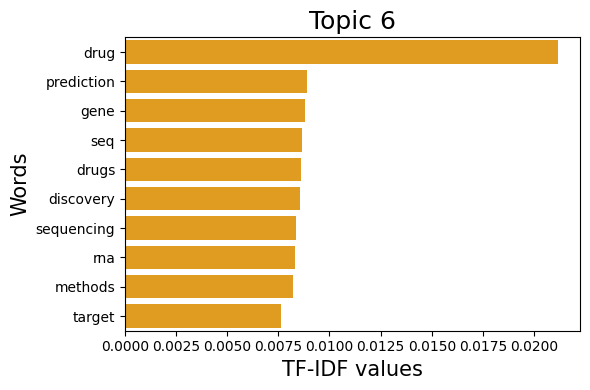

In [ ]:
list_words=[]
list_values=[]
for word, value in topic6:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'orange')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Topic 6", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

## Выделение важных слов в кластерах

In [ ]:
reducer = umap.UMAP(n_neighbors=50,
                            n_components=5,
                         metric='cosine').fit(embs)
embedding = reducer.transform(embs)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = labels

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

In [ ]:
df

Название статьи  \
0      RECOVER: sequential model optimization platfor...   
1      Unsupervised heart abnormality detection based...   
2          Modularity "for free" in genome architecture?   
3      Representing and extracting knowledge from sin...   
4      Predicted disease compositions of human glioma...   
...                                                  ...   
18967  Unveiling the mystery of visual information pr...   
18968  On the Impact of Mutation-Selection Balance on...   
18969  Improving Prognostic Performance in Resectable...   
18970  Analysis of DNA sequence variation within mari...   
18971  Active information requirements for fixation o...   

                                                Абстракт  \
0      large library small molecules, exhaustive comb...   
1      heart sound also known phonocardiogram pcg ana...   
2      background recent model genome proteome evolut...   
3      single cell analysis currently one high resolu...   
4      background purpose biopsy main determinant gli...   
...                                                  ...   
18967  generally accepted human vision extremely powe...   
18968  interplay mutation selection play fundamental ...   
18969  analytic pipeline quantitative imaging feature...   
18970  apply recently developed inference method base...   
18971  context population genetics, active informatio...   

                                    Ссылка           Метка  length  
0         https://arxiv.org/abs/2202.04202          Cancer   236.0  
1         https://arxiv.org/abs/2101.05443  cardiovascular   156.0  
2      https://arxiv.org/abs/q-bio/0312032        genetics   203.0  
3         https://arxiv.org/abs/2304.13084        genetics   162.0  
4         https://arxiv.org/abs/1908.02334          Cancer   250.0  
...                                    ...             ...     ...  
18967      https://arxiv.org/abs/0807.0337   brain disease   238.0  
18968      https://arxiv.org/abs/1012.3098        genetics   195.0  
18969     https://arxiv.org/abs/1907.04822          Cancer   214.0  
18970      https://arxiv.org/abs/1209.0813         DNA/RNA   121.0  
18971     https://arxiv.org/abs/2111.06909        genetics    68.0  

[18972 rows x 5 columns]

In [ ]:
docs_df = pd.DataFrame(df, columns=["Абстракт"])
docs_df['Topic'] = df['Метка']
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Абстракт': ' '.join})

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range,
    stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic.Абстракт.values, m=len(df))

In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Абстракт
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Абстракт":  "Size"},axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

Topic  Size
6             genetics  6244
0               Cancer  3375
8            infection  1760
1              DNA/RNA  1650
9            pneumonia  1535
3        brain disease  1447
4       cardiovascular   905
5  emission tomography   716
2                blood   705
7           healthcare   635

In [ ]:
word_found = [word[0] for word in top_n_words['Cancer'][:10] if word[0] in df['Абстракт'][0].split()]

In [ ]:
data = [('gene', 0.008422304410946994),
        ('genetic', 0.007486765422415466),
        ('evolution', 0.007394551942936645),
        ('selection', 0.007137203065464277),
        ('genes', 0.00701509588783246),
        ('genome', 0.006541830602629935),
        ('expression', 0.006033853225614658),
        ('cell', 0.005797535096939387),
        ('cells', 0.005651317098656042),
        ('species', 0.00536153285418724)]


In [ ]:
list_words=[]
list_values=[]
for word, value in data:
  # print(word)
  list_words.append(word)
  list_values.append(value)

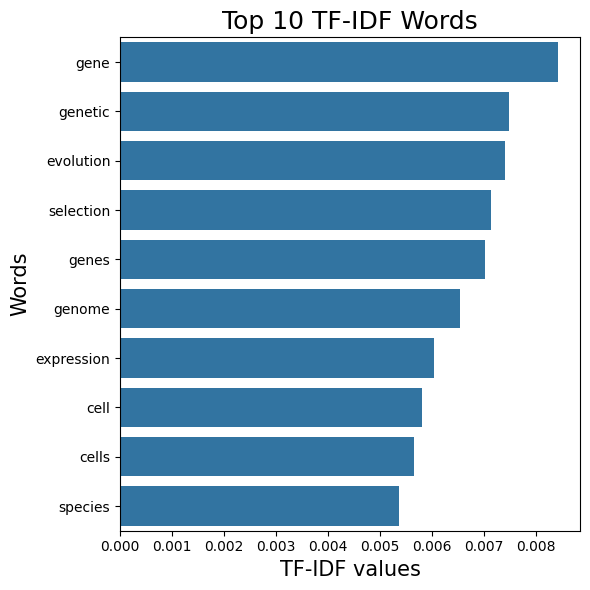

In [ ]:
plt.figure(figsize=(6, 6))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Top 10 TF-IDF Words", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
genetics = top_n_words['genetics'][:5]
genetics

[('genome', 0.007624728855113721),
 ('genetic', 0.007603159985639319),
 ('gene', 0.007574330335031238),
 ('evolution', 0.007510599850111505),
 ('selection', 0.007258495383855723)]

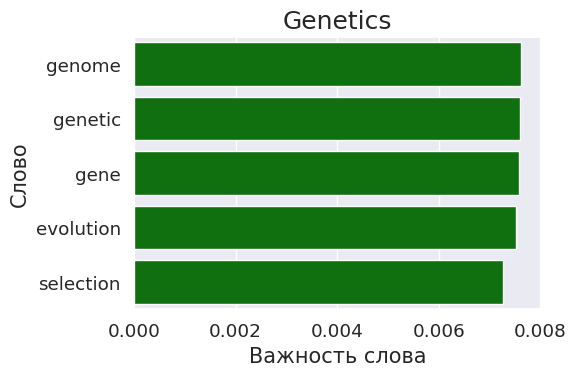

In [ ]:
list_words=[]
list_values=[]
for word, value in genetics:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'green')

# Установка меток и заголовка
plt.xlabel("Важность слова", size=15)
plt.ylabel("Слово", size=15)
plt.title("Genetics", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
cancer = top_n_words['Cancer'][:10]
cancer

[('tumor', 0.01339695239582336),
 ('cancer', 0.012340059035141212),
 ('drug', 0.011814382914474807),
 ('breast', 0.008661912646639972),
 ('treatment', 0.00683660688977877),
 ('patient', 0.006613042052311015),
 ('image', 0.00597302625510844),
 ('tissue', 0.005760459094866143),
 ('learning', 0.005734095280220927),
 ('clinical', 0.005538857952298779)]

In [ ]:
infection = top_n_words['infection'][:10]
infection

[('hiv', 0.021732039227439208),
 ('infection', 0.017207905213624294),
 ('immune', 0.016828923463895643),
 ('immunity', 0.009518150911919718),
 ('infected', 0.009241028131609085),
 ('epidemic', 0.008715615092336752),
 ('virus', 0.008064057203780365),
 ('viral', 0.007575185355844157),
 ('response', 0.0068972857865127),
 ('treatment', 0.005996200846795468)]

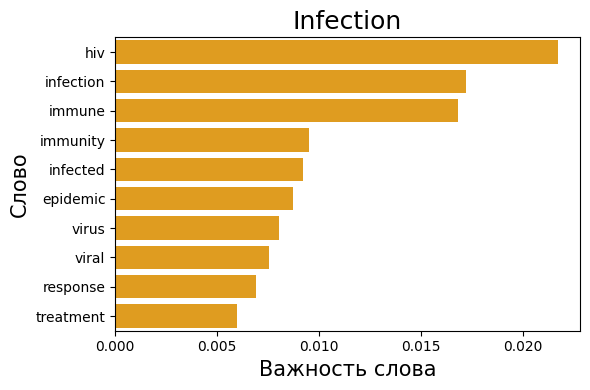

In [ ]:
list_words=[]
list_values=[]
for word, value in infection:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'orange')

# Установка меток и заголовка
plt.xlabel("Важность слова", size=15)
plt.ylabel("Слово", size=15)
plt.title("Infection", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
DNA = top_n_words['DNA/RNA'][:5]
DNA

[('dna', 0.032745847336085966),
 ('rna', 0.02506531425054173),
 ('sequence', 0.013226088362393697),
 ('base', 0.012523313661094994),
 ('molecule', 0.011138590779771921)]

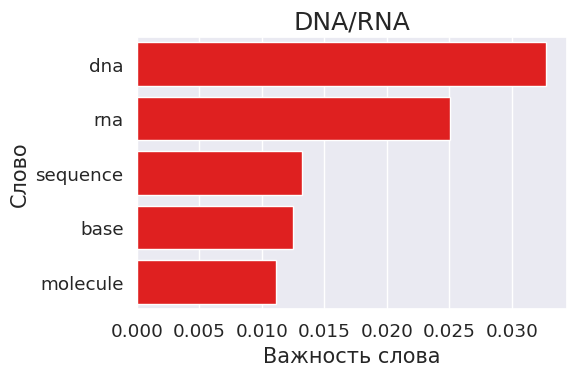

In [ ]:
list_words=[]
list_values=[]
for word, value in DNA:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'red')

# Установка меток и заголовка
plt.xlabel("Важность слова", size=15)
plt.ylabel("Слово", size=15)
plt.title("DNA/RNA", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
pneumonia = top_n_words['pneumonia'][:10]
pneumonia

[('covid', 0.02925007038478164),
 ('19', 0.028562943073251777),
 ('pandemic', 0.014330035729676687),
 ('pneumonia', 0.013964530660160887),
 ('cases', 0.011402597301056805),
 ('spread', 0.010277611732472328),
 ('epidemic', 0.010229213600726393),
 ('disease', 0.009113075019333313),
 ('countries', 0.008691104951741913),
 ('infected', 0.008341750527737675)]

In [ ]:
brain = top_n_words['brain disease'][:10]
brain

[('brain', 0.03563799680071979),
 ('functional', 0.013807563317614258),
 ('connectivity', 0.013329337260025829),
 ('activity', 0.010173752904429996),
 ('eeg', 0.009944860265738648),
 ('fmri', 0.009894788489282305),
 ('neural', 0.009726415726672592),
 ('cognitive', 0.009106190009685254),
 ('network', 0.00836830990658209),
 ('subject', 0.007894714906830342)]

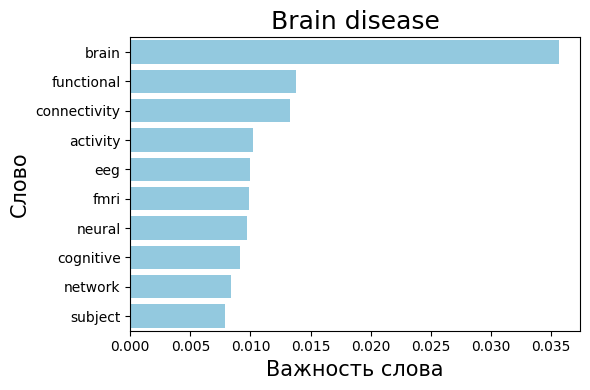

In [ ]:
list_words=[]
list_values=[]
for word, value in brain:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'skyblue')

# Установка меток и заголовка
plt.xlabel("Важность слова", size=15)
plt.ylabel("Слово", size=15)
plt.title("Brain disease", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
cardiovascular = top_n_words['cardiovascular'][:10]
cardiovascular

[('cardiovascular', 0.027697651309950912),
 ('ecg', 0.015466330323432682),
 ('heart', 0.014610342976658112),
 ('cardiac', 0.01348114643766446),
 ('risk', 0.008978494503825768),
 ('diseases', 0.008399586282333213),
 ('cvd', 0.007118500925856436),
 ('pressure', 0.00690807922516619),
 ('health', 0.006723060441287779),
 ('segmentation', 0.006587005780804028)]

In [ ]:
tomography = top_n_words['emission tomography'][:10]
tomography

[('emission', 0.0339198169033394),
 ('pet', 0.033280638625113754),
 ('tomography', 0.029394818449227565),
 ('positron', 0.01827572856157542),
 ('image', 0.012197298701873145),
 ('reconstruction', 0.012068709909527943),
 ('imaging', 0.011857883689748265),
 ('resolution', 0.011055456941192069),
 ('accretion', 0.009021986659336987),
 ('photon', 0.009019647755126122)]

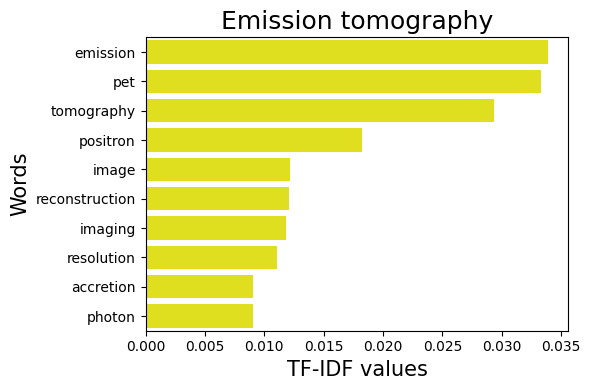

In [ ]:
list_words=[]
list_values=[]
for word, value in tomography:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'yellow')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Emission tomography", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
blood = top_n_words['blood'][:10]
blood

[('blood', 0.04763463322275757),
 ('flow', 0.022252527390631445),
 ('pressure', 0.013769575708895),
 ('red', 0.012724759539691266),
 ('bp', 0.011738366106449677),
 ('vessel', 0.011654175472692322),
 ('vessels', 0.01063662424297623),
 ('rbcs', 0.010610294347320767),
 ('rbc', 0.008504880485094088),
 ('shear', 0.008219852105281962)]

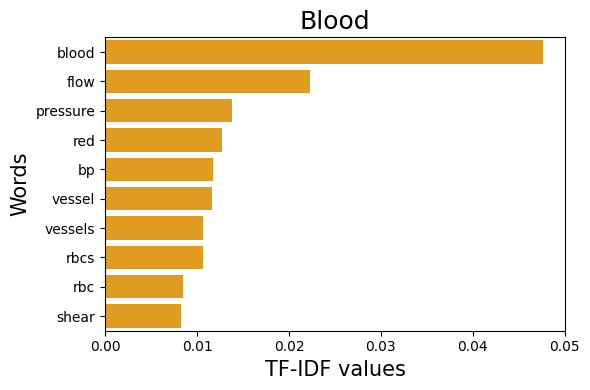

In [ ]:
list_words=[]
list_values=[]
for word, value in blood:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'orange')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Blood", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
healthcare = top_n_words['healthcare'][:10]
healthcare

[('healthcare', 0.0567990686725917),
 ('medical', 0.01569576575400291),
 ('privacy', 0.01541714018782856),
 ('health', 0.013941319186025512),
 ('security', 0.013268465051169505),
 ('ai', 0.013207359663668714),
 ('iot', 0.01272155766244438),
 ('patient', 0.01123075733161749),
 ('blockchain', 0.010880848326242707),
 ('applications', 0.009813450983478297)]

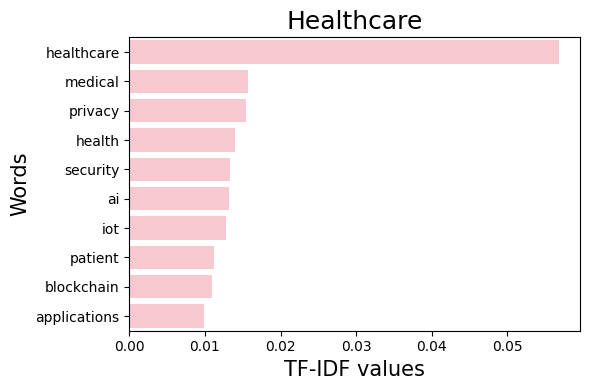

In [ ]:
list_words=[]
list_values=[]
for word, value in healthcare:
  # print(word)
  list_words.append(word)
  list_values.append(value)

plt.figure(figsize=(6, 4))

# Создание горизонтальной столбчатой диаграммы с сортировкой столбцов
sns.barplot(x=list_values, y=list_words, orient='h', color = 'pink')

# Установка меток и заголовка
plt.xlabel("TF-IDF values", size=15)
plt.ylabel("Words", size=15)
plt.title("Healthcare", size=18)

plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

## Эмбеддинги

# Longformer_smart

In [ ]:
emb = np.load('longformer_smart_8.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=20,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

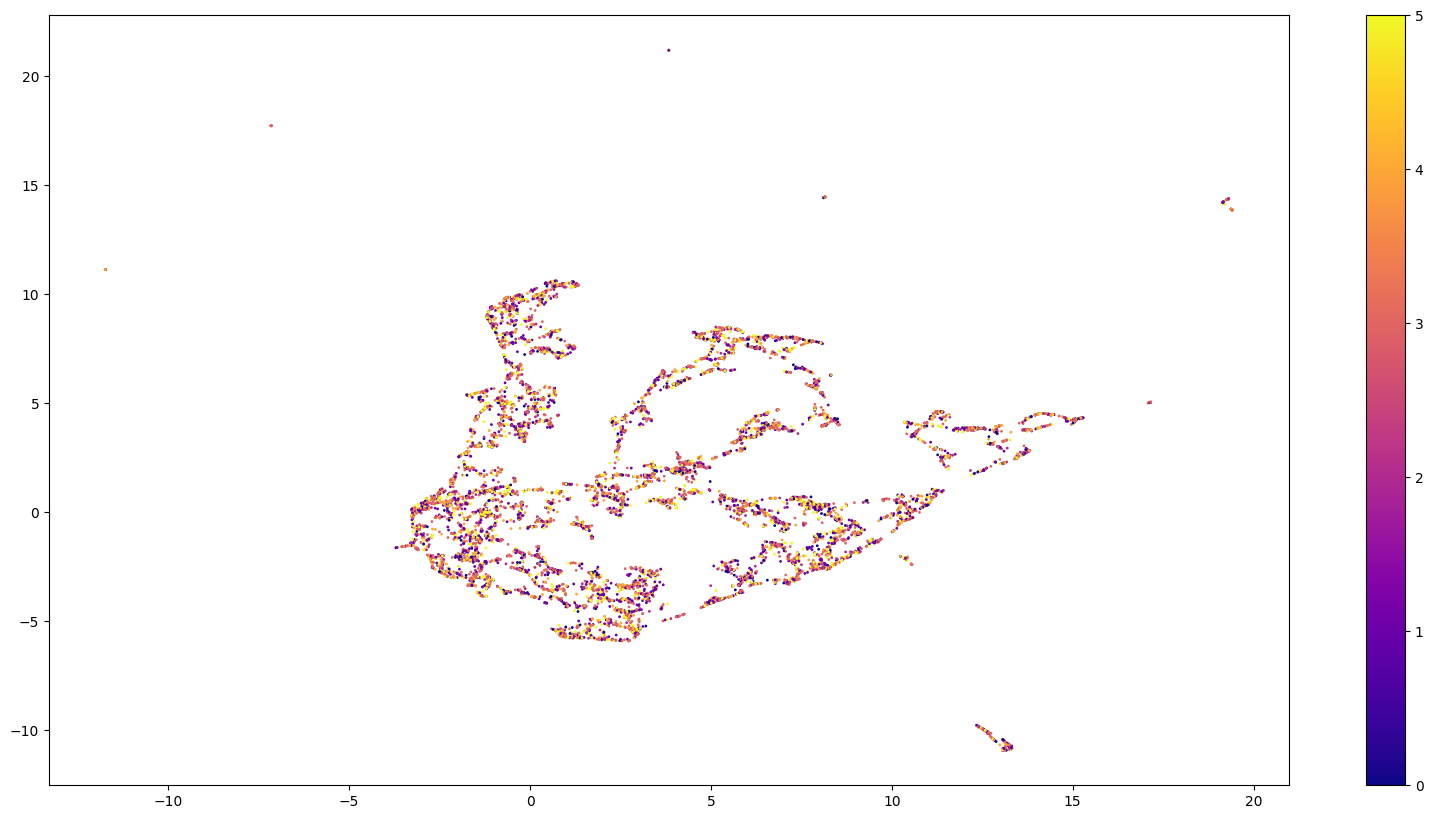

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

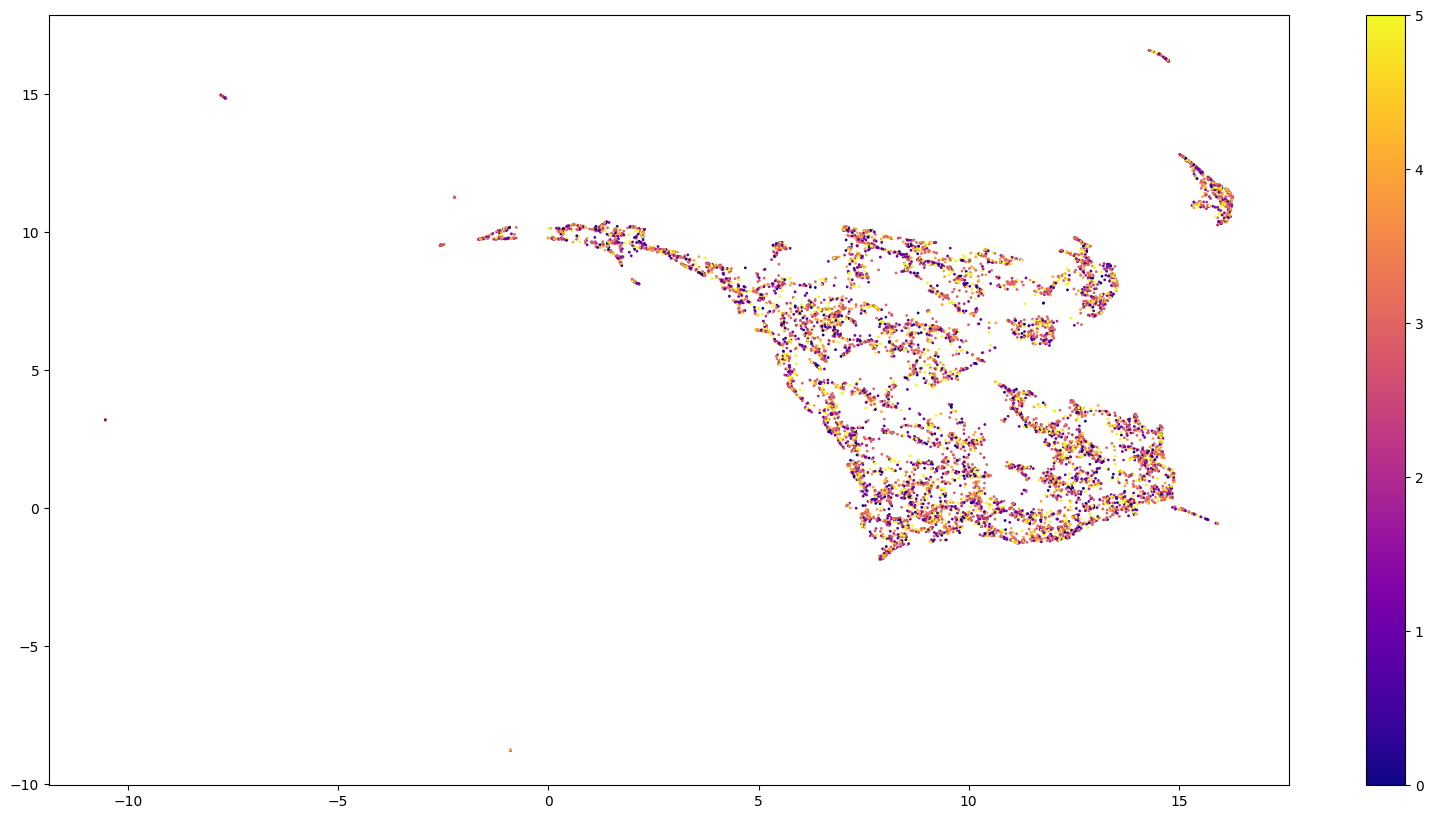

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

## BERT

Transformer XL

In [ ]:
emb = np.load('XL.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=50,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=50, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

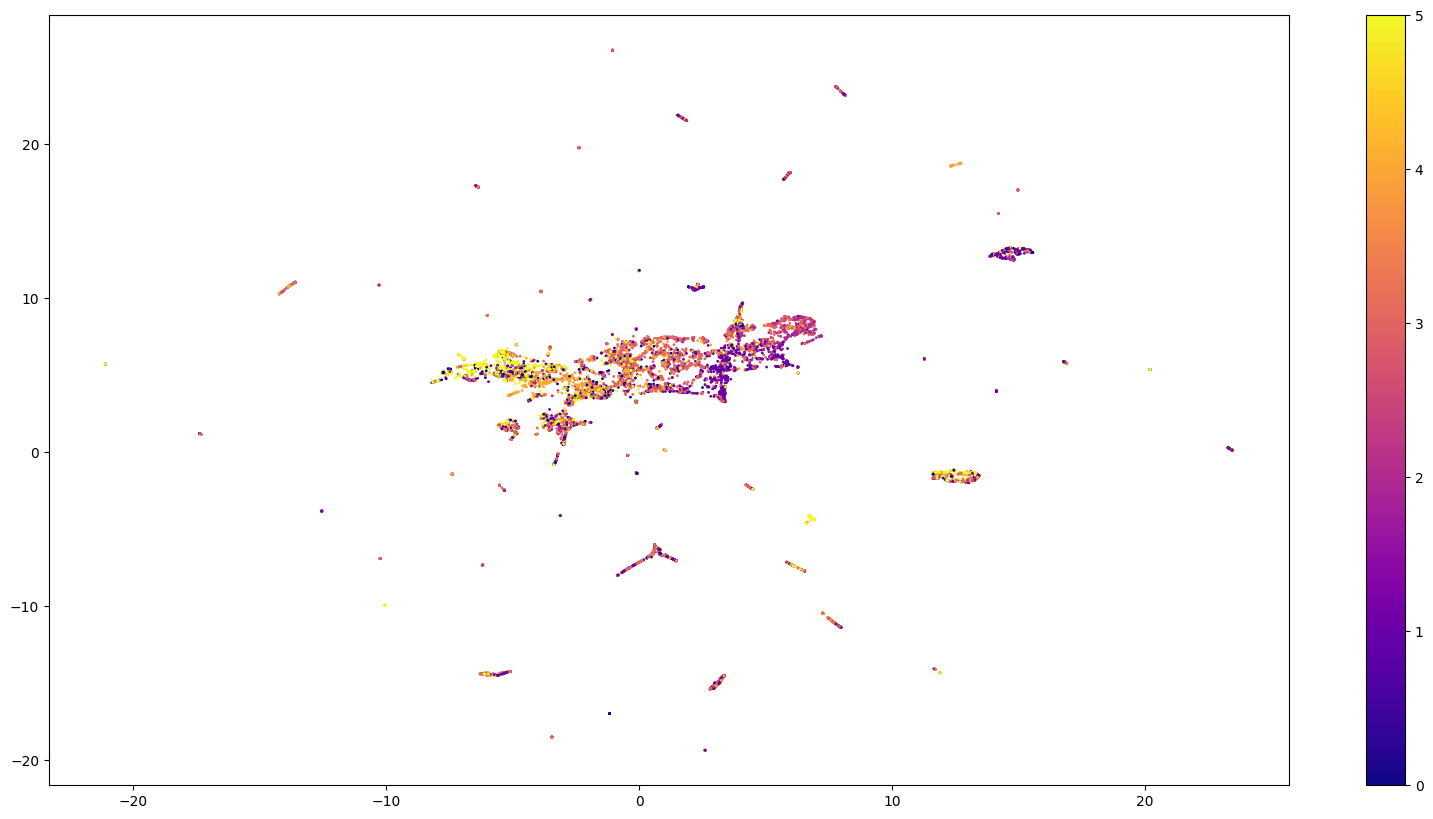

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

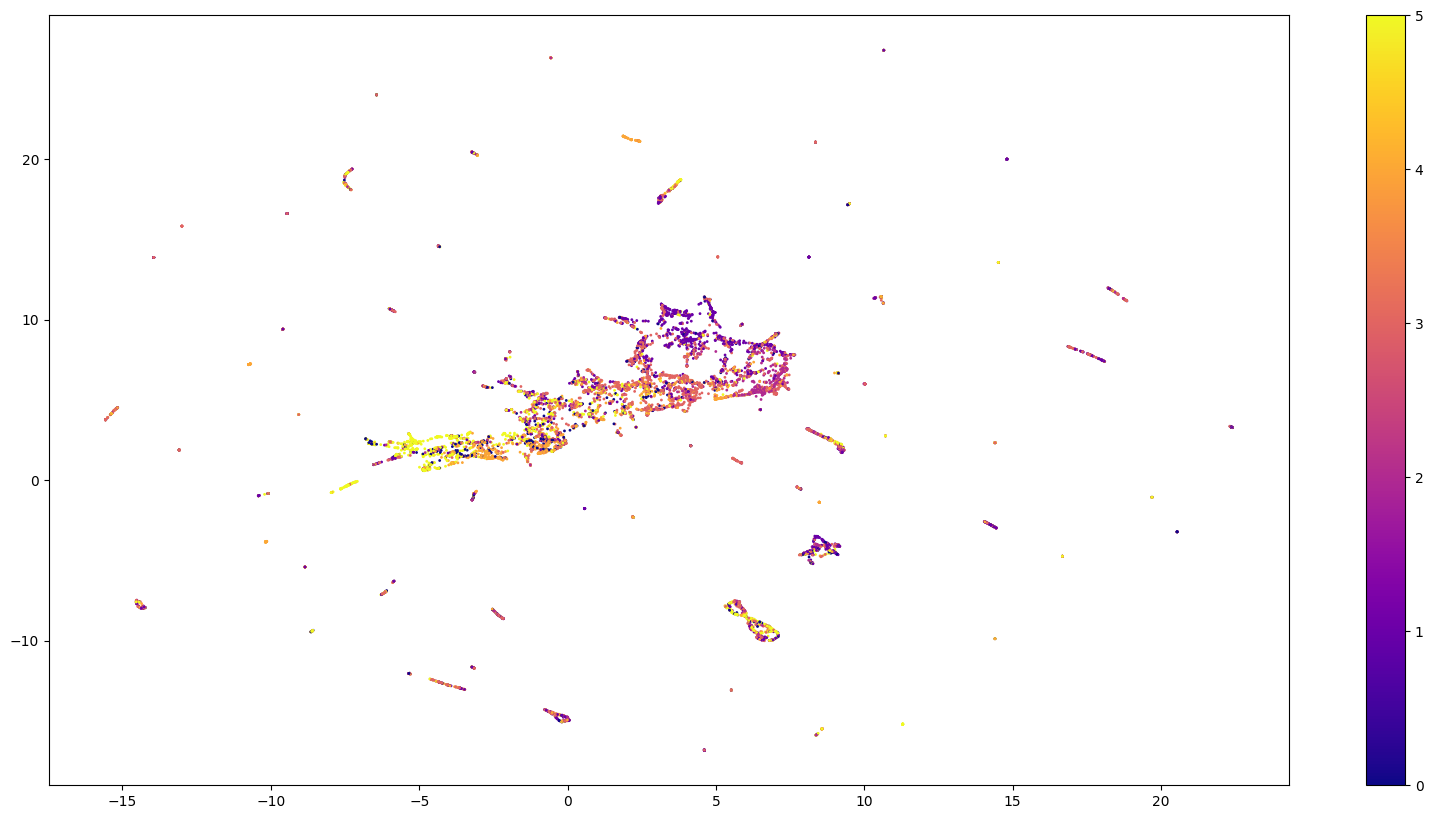

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

bluebert_mimic

In [ ]:
emb = np.load('bluebert_mimic.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

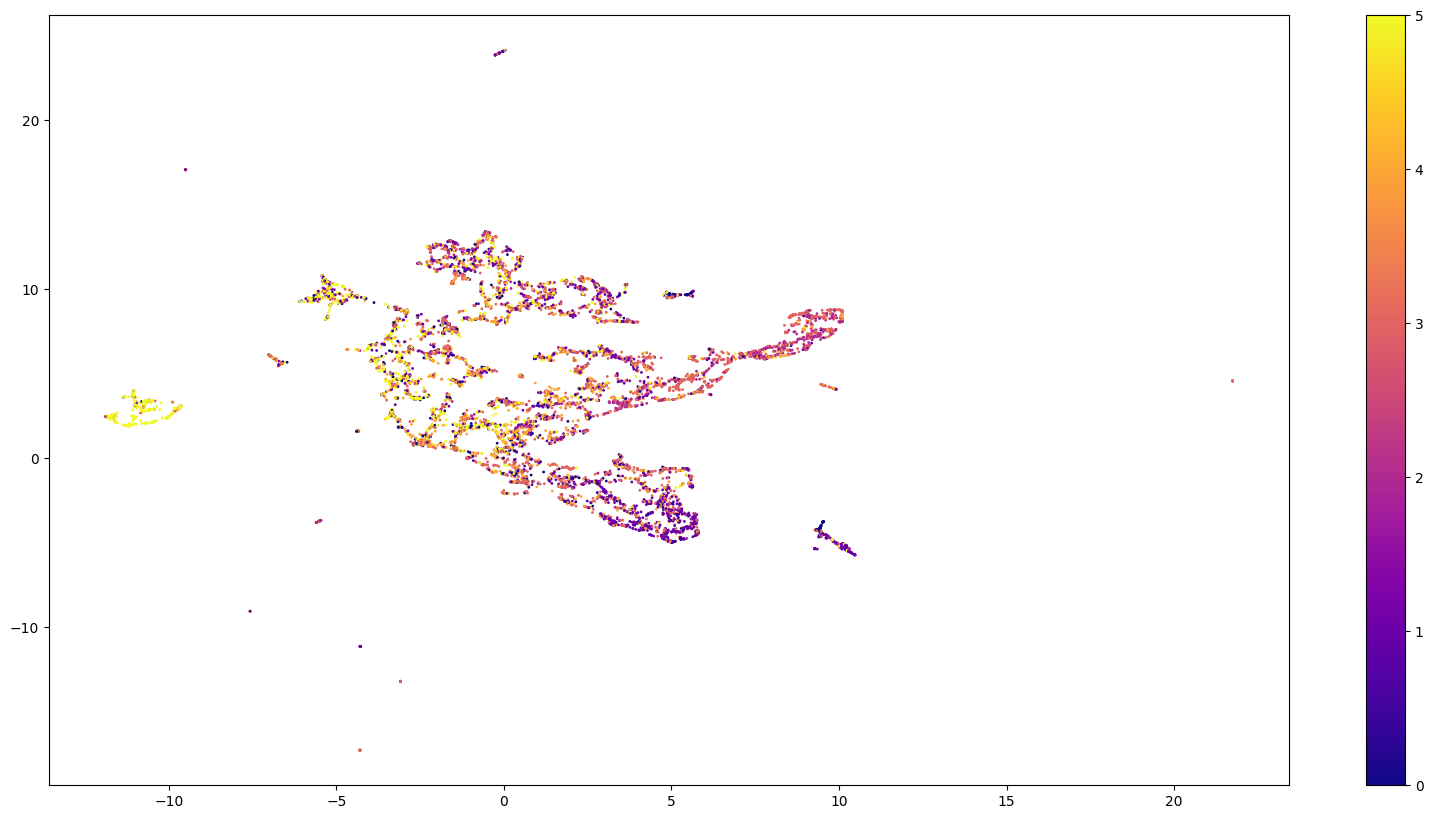

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

bluebert_pubmed_uncased

In [ ]:
emb = np.load('bluebert_pubmed_uncased.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

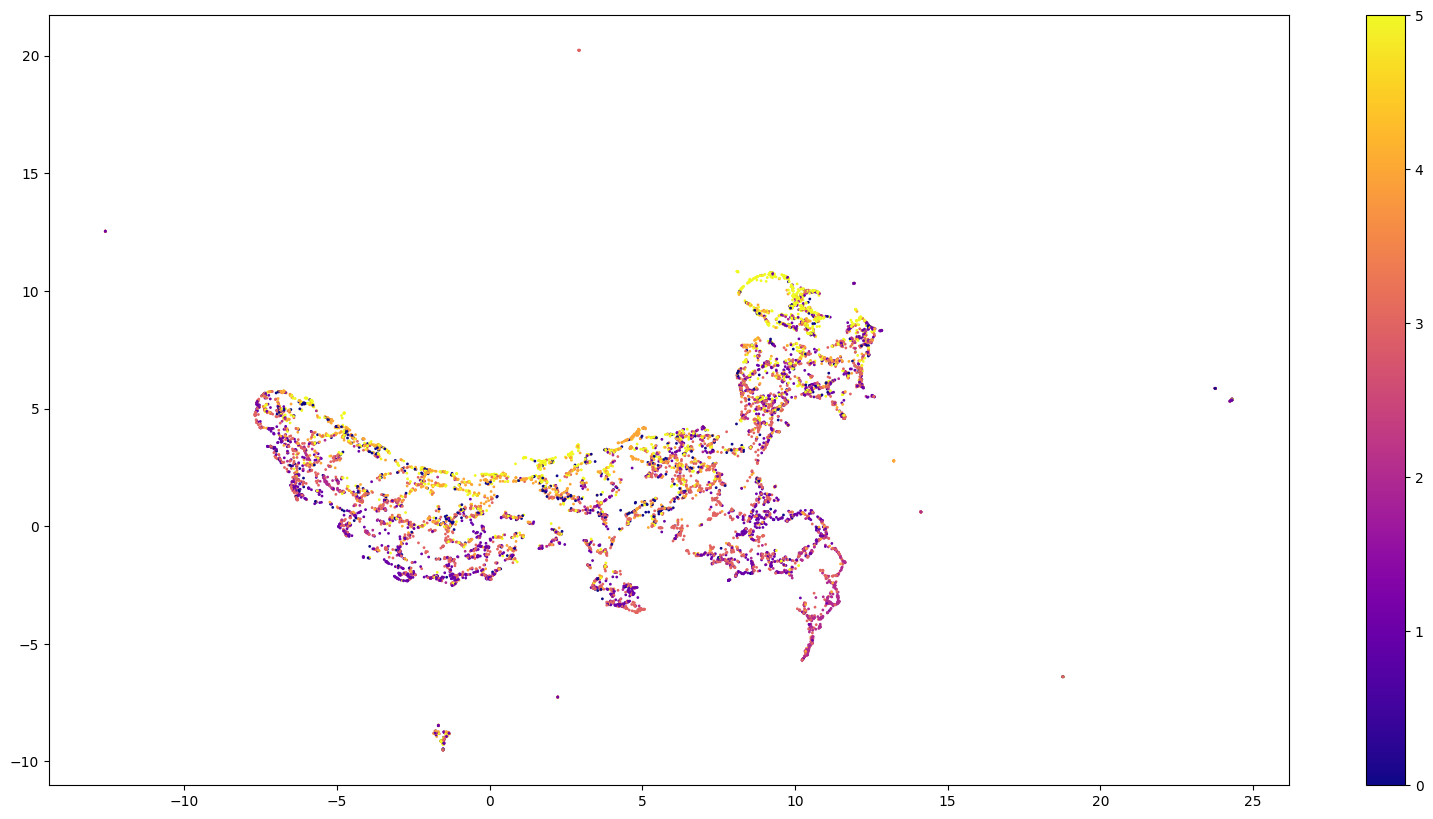

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

distilbert

In [ ]:
emb = np.load('distilbert.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])

NameError: ignored

In [ ]:
result['labels'] = df['Cat1']

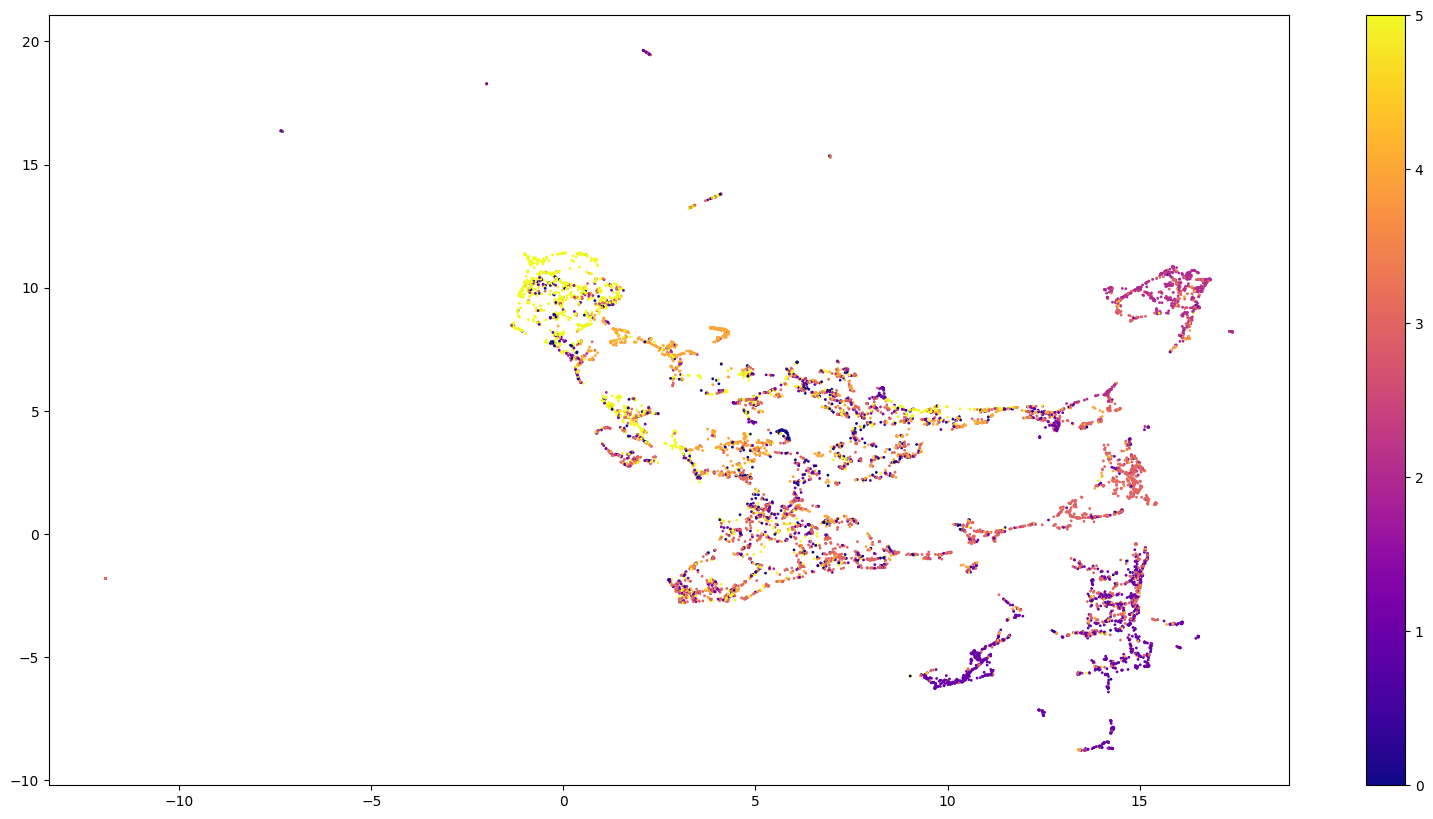

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

#### roberta-base

In [ ]:
import umap.umap_ as umap

In [ ]:
emb = np.load('roberta-base (1).npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

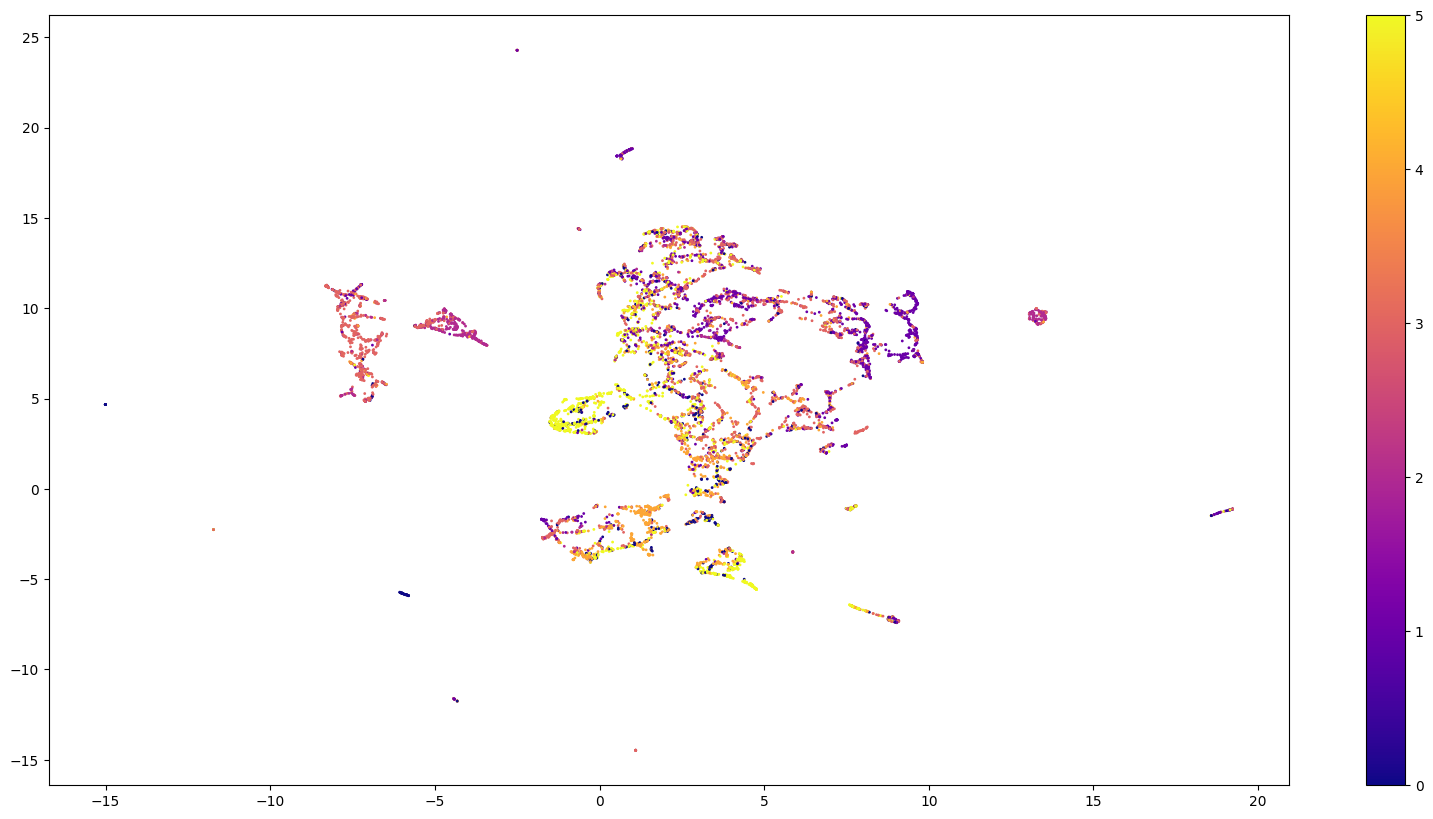

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### bert-base-uncased

In [ ]:
emb = np.load('bert-base-uncased (1).npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

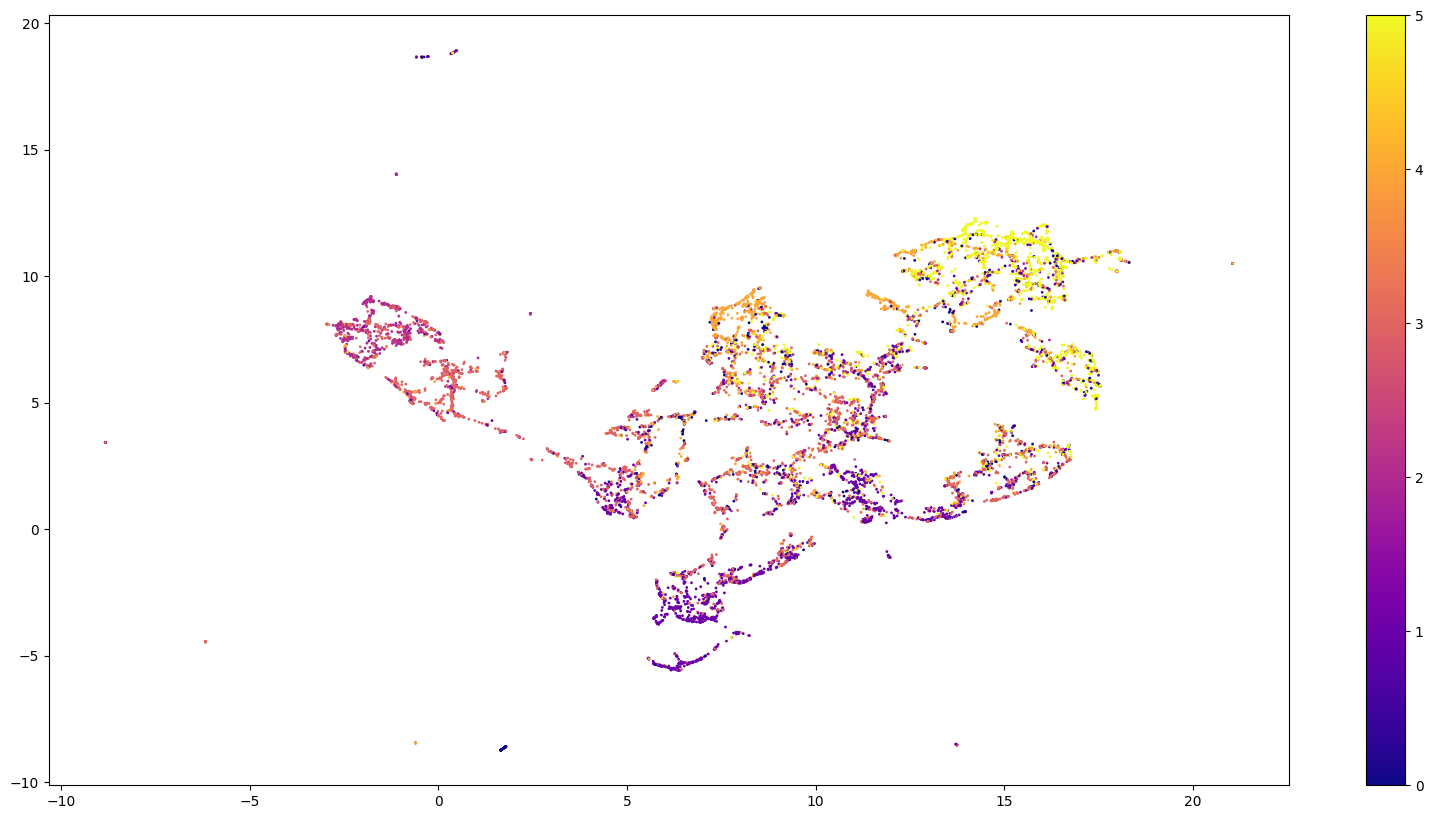

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### embedings_bluebert_12

In [ ]:
emb = np.load('longformer.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)

In [ ]:
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])

In [ ]:
result['labels'] = df['Cat1']

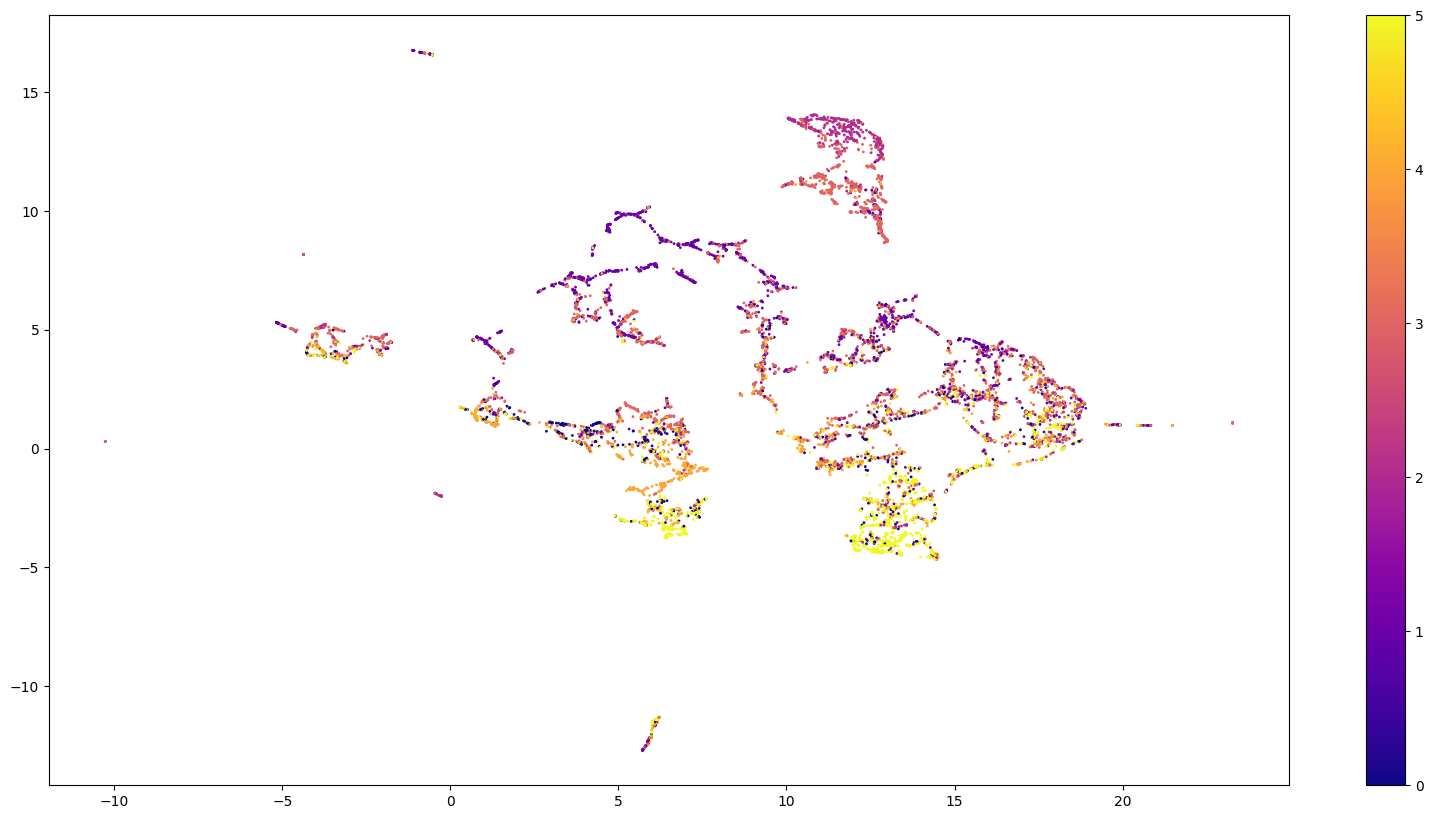

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### embedings_bluebert_mimic12

In [ ]:
emb = np.load('embedings_bluebert_mimic12.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['condition_label']

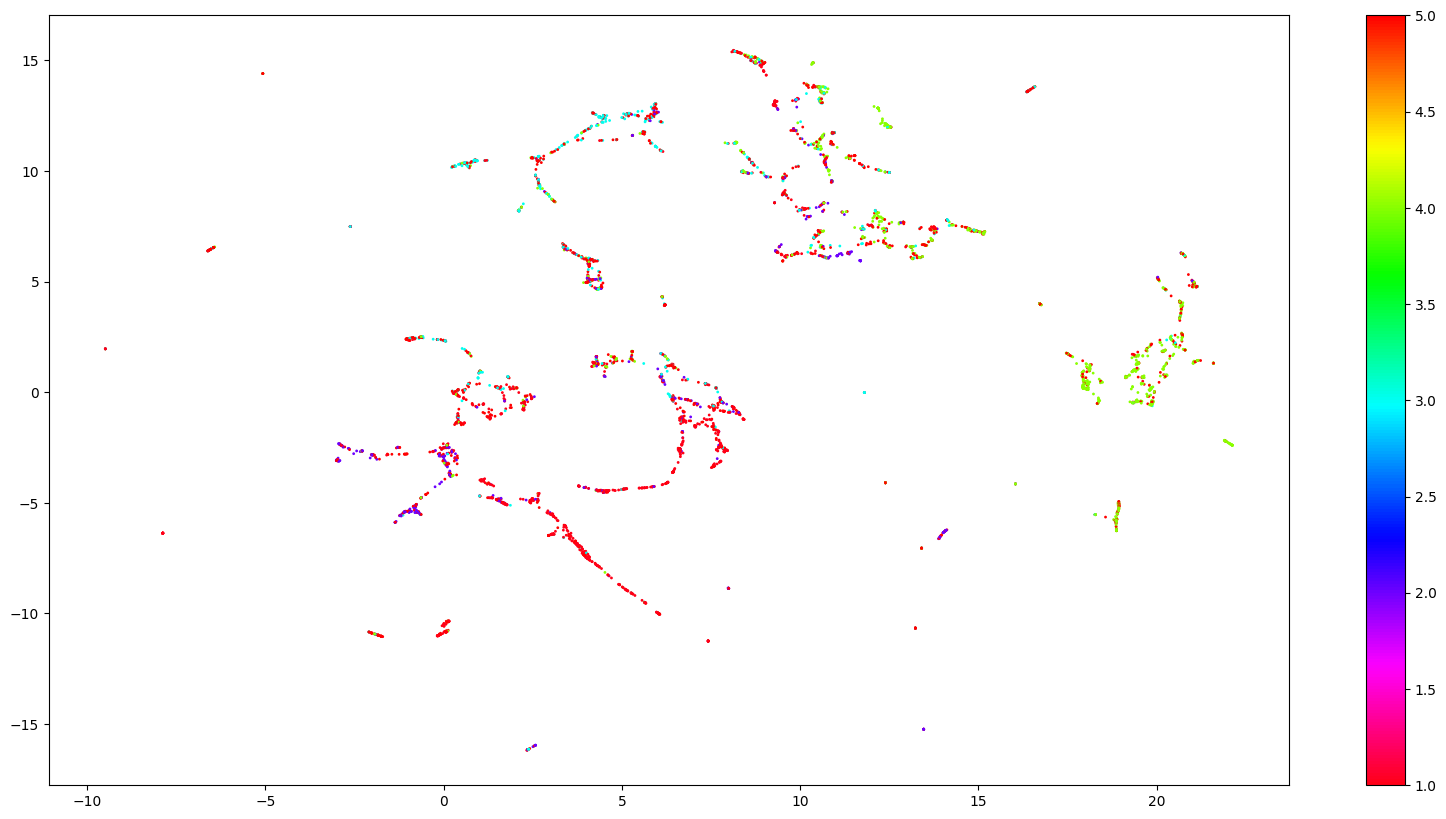

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='hsv_r')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### word2vec

In [ ]:
emb = np.load('word2vec (2).npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

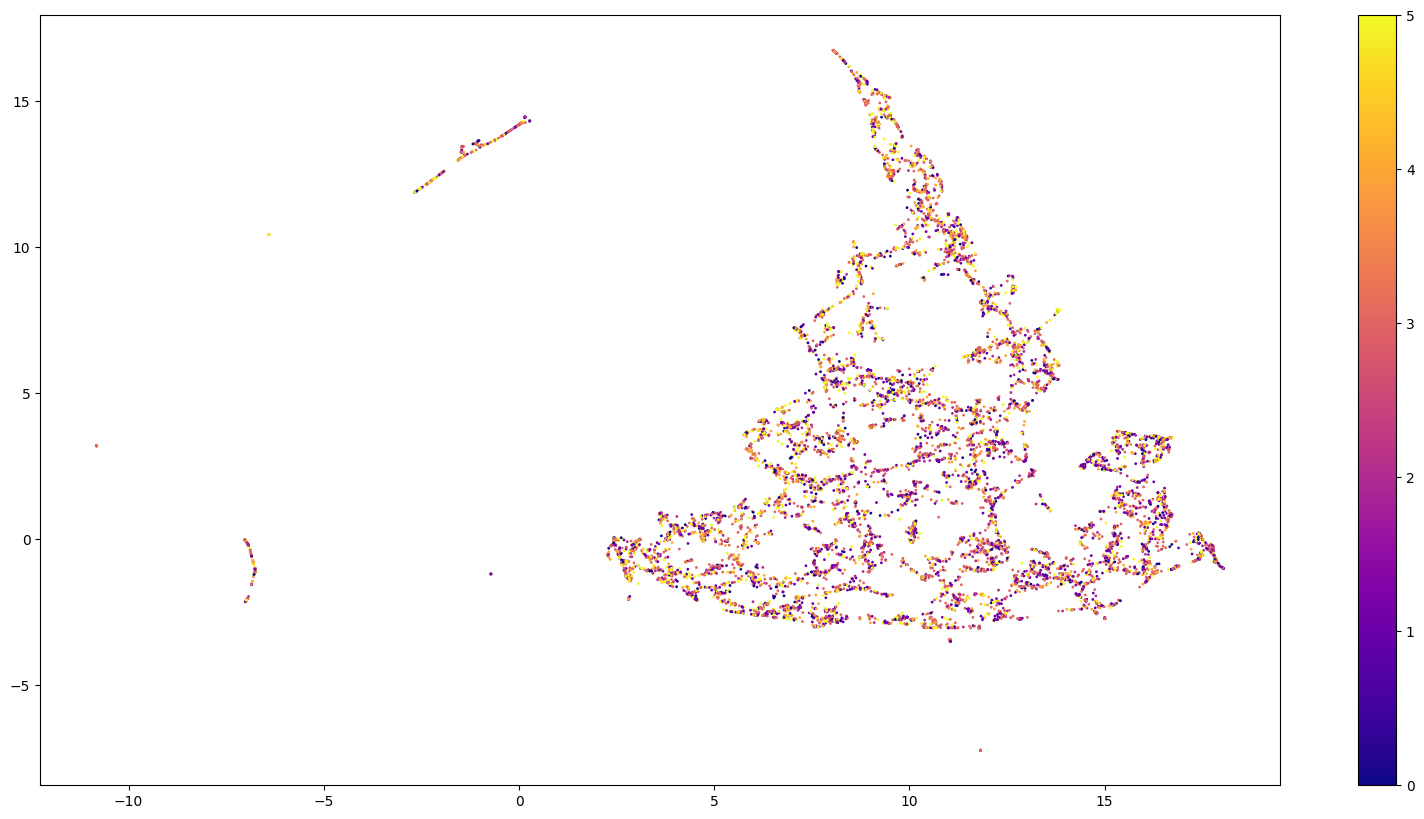

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### fast_text

In [ ]:
emb = np.load('fast_text (1).npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

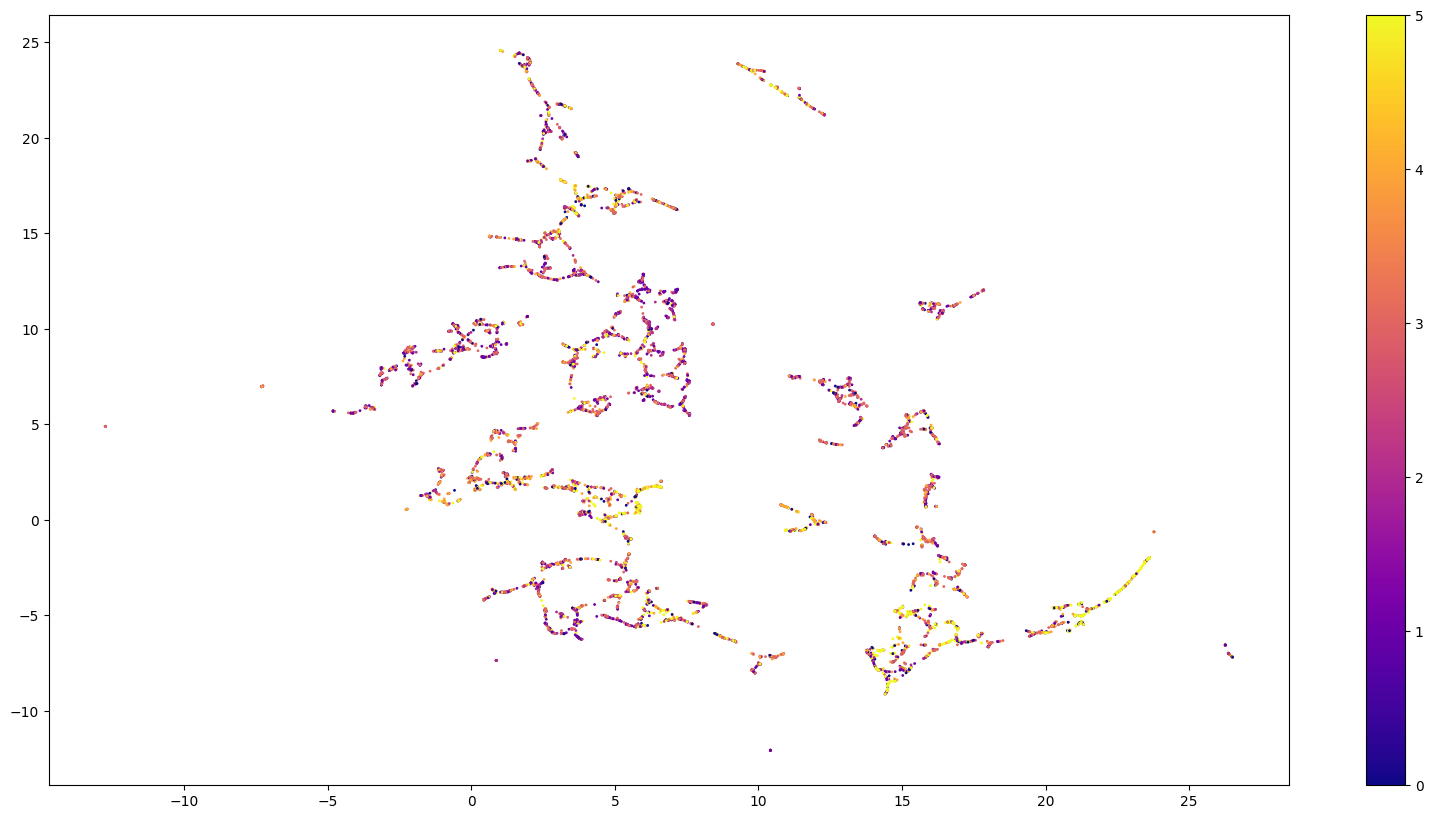

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### emb_glove

In [ ]:
emb = np.load('emb_glove (1).npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

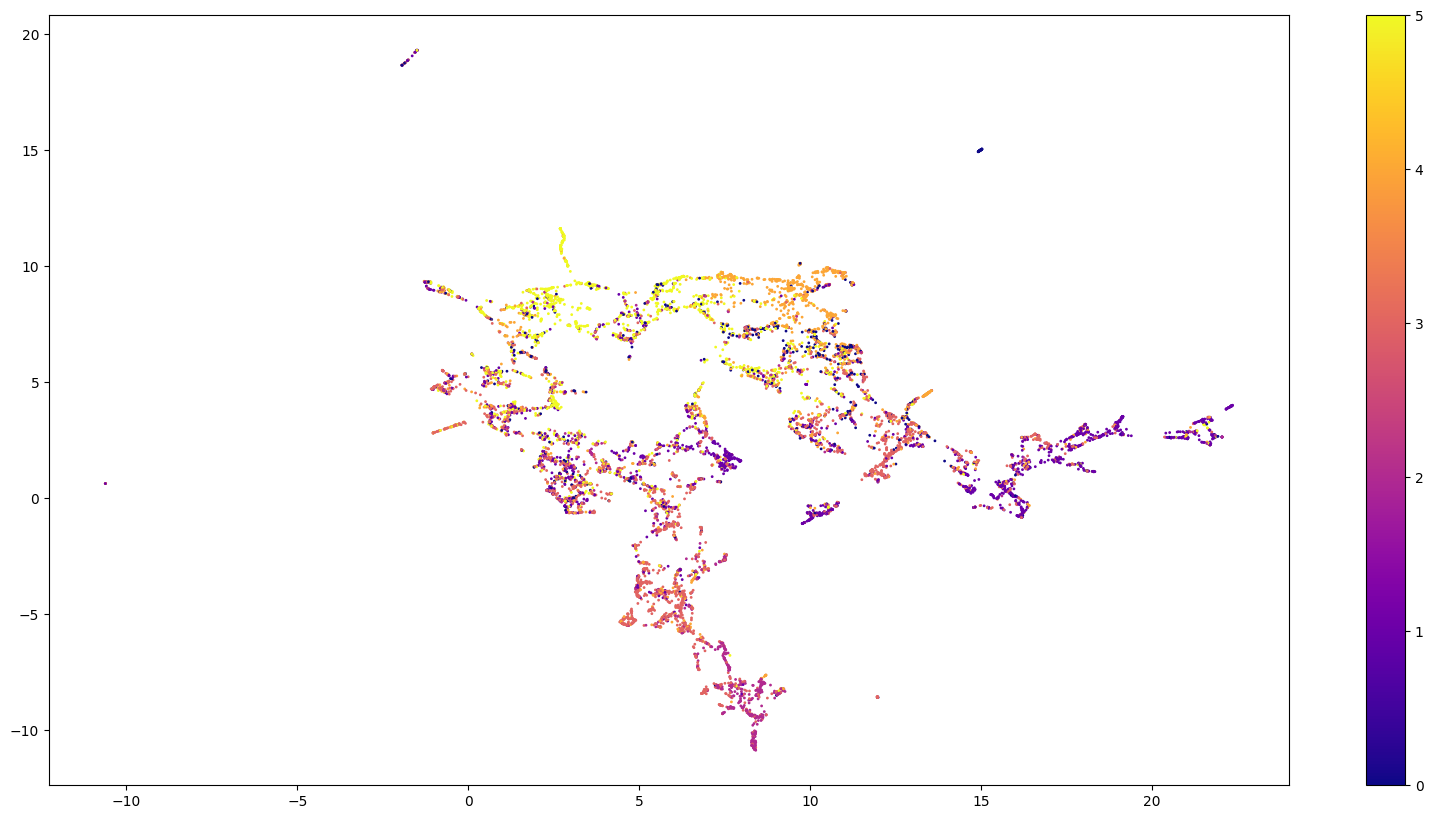

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### doc2vec

In [ ]:
emb = np.load('doc2vec.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

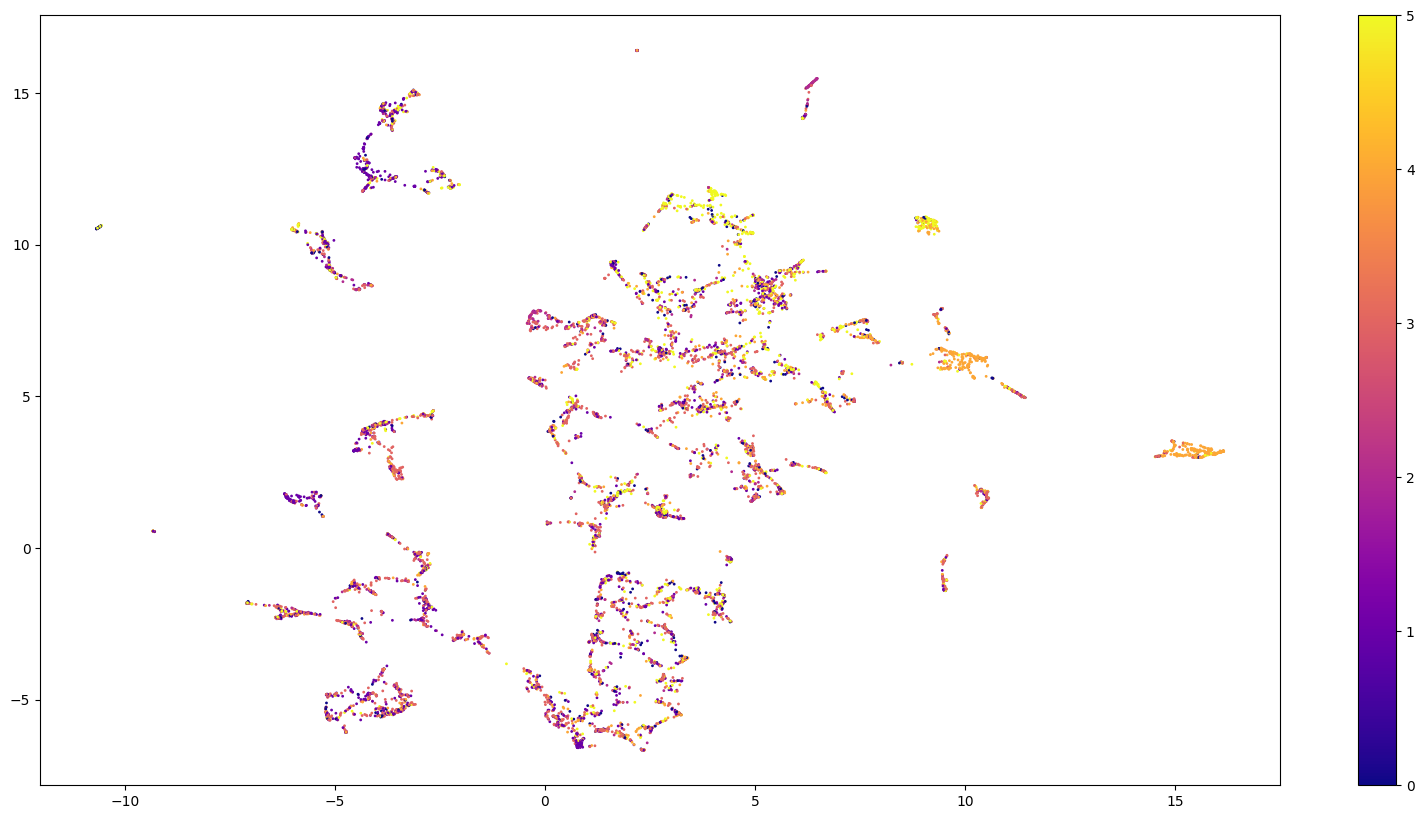

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### TF-Idf

In [ ]:
emb = np.load('tfidf (1).npy')

ValueError: ignored

In [ ]:
reducer = umap.UMAP(n_neighbors=30,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)


In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=30, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['Cat1']

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='plasma')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()

### bag of words

In [ ]:
emb = np.load('tfidf.npy')

In [ ]:
reducer = umap.UMAP(n_neighbors=15,
                            n_components=5,
                         metric='cosine').fit(emb)
embedding = reducer.transform(emb)


In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['condition_label']

In [ ]:
# Визуализация кластеров 15
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='hsv_r')
plt.colorbar()

In [ ]:
import plotly.express as px
fig = px.scatter(result, x='x', y='y', color='labels', width=1500, height=1000)
fig.show()